# **Mean Squared Error (MSE) or Cost Function**  

**Mean Squared Error (MSE)** is a widely used metric for evaluating the performance of regression models. It measures the average squared difference between actual and predicted values.  

![Screenshot (124).png](<attachment:Screenshot (124).png>)
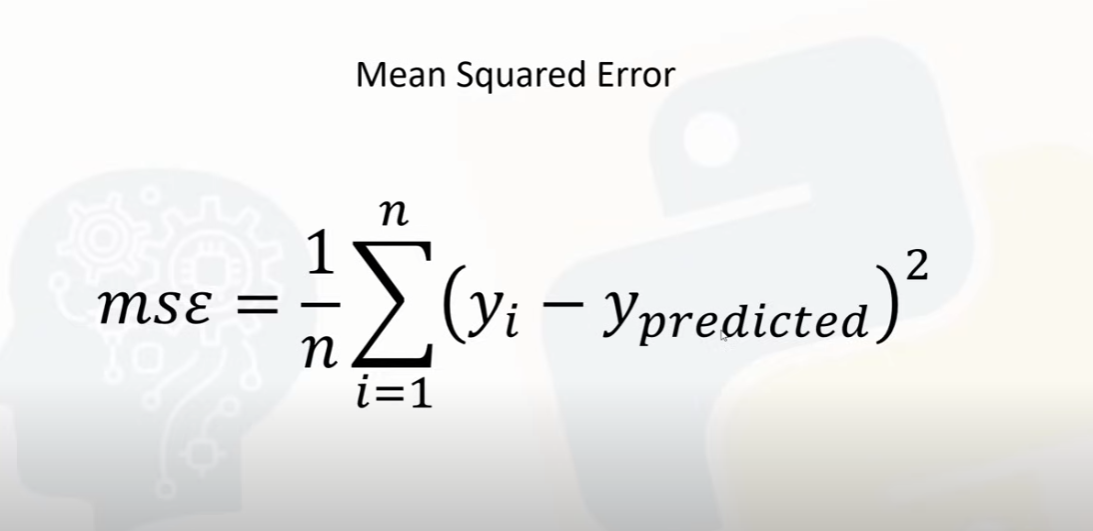

#### where 
- n = total number of observations
- yi = actual value
- ypredicted = predicted value


![Screenshot (125).png](<attachment:Screenshot (125).png>)
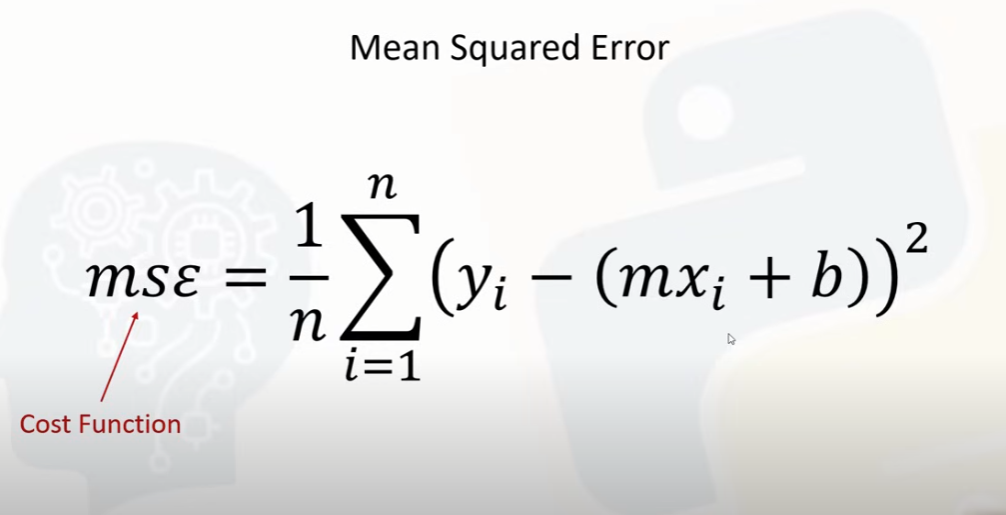

#### ypredicted replaced with "mxi + b"
 for y = mx + b  

# **Gradient Descent**

Gradient Descent is the algorithm that finds the best fit line for the given training data set

![Screenshot (126).png](<attachment:Screenshot (126).png>)
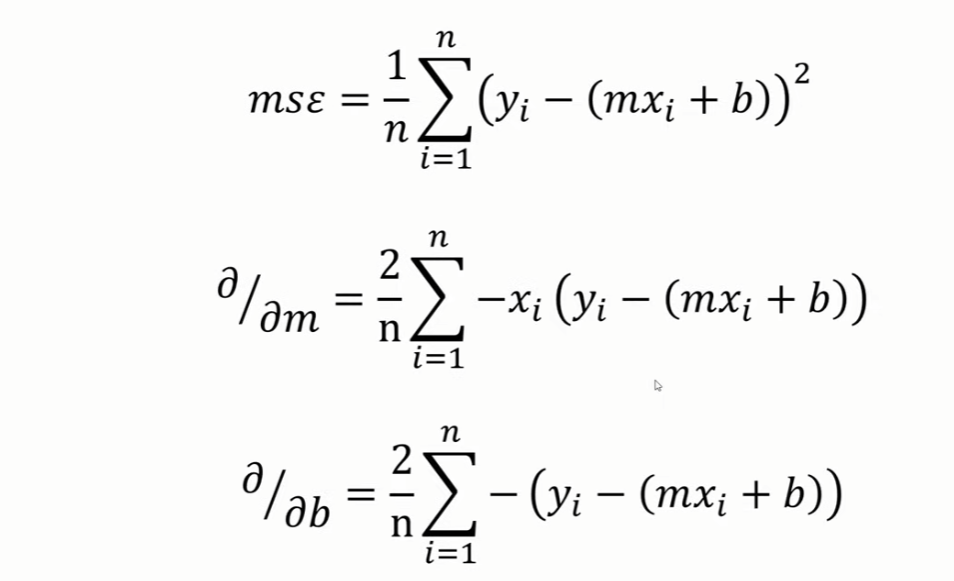

- m = m - learning rate * d/dx
- n = n - learning rate * d/dy

In [1]:
import numpy as np

def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.08
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val ** 2 for val in (y - y_predicted)])
    
        md = -(2/n) * sum(x*(y-y_predicted))
        bd = -(2/n) * sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print("m {}, b {}, cost{}, iteration {}".format(m_curr,b_curr,cost, i))




x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)


m 4.96, b 1.44, cost89.0, iteration 0
m 0.4991999999999983, b 0.26879999999999993, cost71.10560000000002, iteration 1
m 4.451584000000002, b 1.426176000000001, cost56.8297702400001, iteration 2
m 0.892231679999997, b 0.5012275199999995, cost45.43965675929613, iteration 3
m 4.041314713600002, b 1.432759910400001, cost36.35088701894832, iteration 4
m 1.2008760606719973, b 0.7036872622079998, cost29.097483330142282, iteration 5
m 3.7095643080294423, b 1.4546767911321612, cost23.307872849944438, iteration 6
m 1.4424862661541864, b 0.881337636696883, cost18.685758762535738, iteration 7
m 3.4406683721083144, b 1.4879302070713722, cost14.994867596913156, iteration 8
m 1.6308855378034224, b 1.0383405553279617, cost12.046787238456794, iteration 9
m 3.2221235247119777, b 1.5293810083298451, cost9.691269350698109, iteration 10
m 1.7770832372205707, b 1.1780607551353204, cost7.8084968312098315, iteration 11
m 3.0439475772474127, b 1.5765710804477953, cost6.302918117062937, iteration 12
m 1.8898457

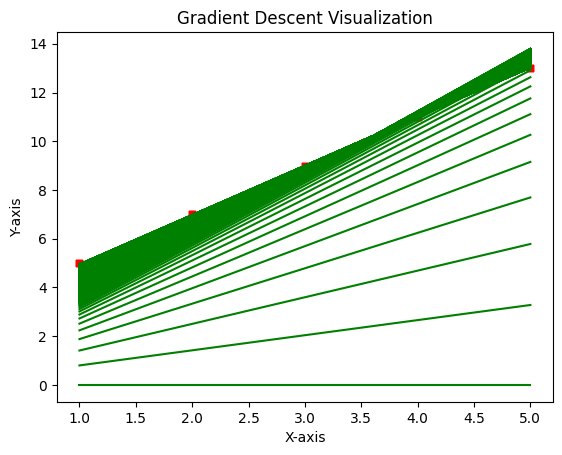

Final m: 2.021281045682893, Final b: 2.923168672645527


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y):
    m_curr = b_curr = 0  # Initialize parameters
    rate = 0.01  # Learning rate
    n = len(x)

    plt.scatter(x, y, color='red', marker='+', linewidth=5)  # Plot data points

    for i in range(1000):  # 10,000 is too high for visualization
        y_predicted = m_curr * x + b_curr
        
        # Compute gradients
        md = -(2/n) * sum(x * (y - y_predicted))
        bd = -(2/n) * sum(y - y_predicted)
        
        # Update parameters
        m_curr -= rate * md
        b_curr -= rate * bd
        
        #plot the line
        plt.plot(x, y_predicted, color='green')
    
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Gradient Descent Visualization")
    plt.show()
    
    return m_curr, b_curr  # Return final values

# Sample Data
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

# Run the function
final_m, final_b = gradient_descent(x, y)
print(f"Final m: {final_m}, Final b: {final_b}")


#### Exercise

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('test_scores.csv')
df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [6]:
def linear_reg(x,y):
    r = LinearRegression()
    x = x.reshape(-1,1)
    r.fit(x,y)
    return r.coef_,r.intercept_
    
    

def gradient_descent(x,y):
    m_curr = b_curr = 0
    n = len(x)
    lrate = 0.0001
    cost_prev = 0

    for i in range(1000):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([ val ** 2 for val in (y - y_predicted)])

        md = -(2/n) * sum(x * (y - y_predicted))
        bd = -(2/n) * sum(y - y_predicted)

        m_curr = m_curr - lrate * md
        b_curr = b_curr - lrate * bd
        if math.isclose(cost, cost_prev, rel_tol=1e-20):
            break
        cost_prev = cost

        print(f"Cost = {cost}, m = {m_curr} , b = {b_curr}")

    return m_curr,b_curr



if __name__ == "__main__":
    x = np.array(df.math)
    y = np.array(df.cs)
    
    m,b =  gradient_descent(x,y)
    print(f"Using gradient descent function : coef = {m} , interceptt = {b} ")

    m,b = linear_reg(x,y)
    
    print(f"Using linear regression model : coef = {m}, intercept = {b}")
    

Cost = 5199.1, m = 0.9891800000000002 , b = 0.013980000000000001
Cost = 46.3330473650399, m = 1.0416176032 , b = 0.0147417592
Cost = 31.852649863558305, m = 1.0443971065873279 , b = 0.014802799669408
Cost = 31.811952059367805, m = 1.0445441606668626 , b = 0.014826693765467417
Cost = 31.811832943358482, m = 1.0445516647187705 , b = 0.014848618440205038
Cost = 31.81182786237329, m = 1.0445517710206773 , b = 0.014870438475874223
Cost = 31.811823101960222, m = 1.0445514851602624 , b = 0.0148922527273428
Cost = 31.81181834255699, m = 1.0445511785140886 , b = 0.014914066435056226
Cost = 31.811813583265543, m = 1.0445508707693771 , b = 0.01493587987682099
Cost = 31.811808824083364, m = 1.0445505629697767 , b = 0.014957693067366749
Cost = 31.811804065010467, m = 1.044550255170612 , b = 0.014979506007477059
Cost = 31.81179930604682, m = 1.0445499473748168 , b = 0.015001318697196186
Cost = 31.811794547192434, m = 1.0445496395825458 , b = 0.015023131136529195
Cost = 31.81178978844727, m = 1.04454